# What's included in the script:
1. How to generate random numbers?
2. How to simulate coin tossing by random number generator? 
3. What's a *distribution*? What're they look like?
4. Re-visit coin tossing, but this time you got a unfair coin. 
5. **[Hardcore Stat]** The random number generation mechanism 

# 1. How to generate random numbers?

**Generate random integer between certain range**  

In [1]:
import numpy as np
import pandas as pd
rnd = np.random.randint(low=1,high=100,size=10)
print(rnd)

[80 76 53 57 78 27 86 43 22 29]


In [2]:
# let's repeat and see if it's random.
rnd = np.random.randint(low=1,high=100,size=10)
print(rnd)

[72 47 55 37 28 16 88 18 82 98]


# 2. How to simulate coin tossing by random number generator? 

**What's it look like when a fair coin is tossed 10 times?**

**If we tossed the coin many times (say 10,000), what's the probability of getting the head (or tail)?**

In [3]:
coin_flip_series =pd.Series(np.random.randint(low=0,high=2,size=10))
print(coin_flip_series.values)

[0 1 0 0 1 1 1 0 0 1]


In [4]:
re = np.random.randint(low=0,high=2,size=10000)
np.mean(re)

0.496

# 3. What's a *distribution*? What're they look like?

[**Uniform Distribution**](https://en.wikipedia.org/wiki/Continuous_uniform_distribution): each event / value has equal probability to be observed. 

In [5]:
print(np.random.uniform(size=5))

[0.12722739 0.79008873 0.53964682 0.99995551 0.9416197 ]


**Example**: Suppose the length of an NBA game is uniformly distributed between 120 and 170 minutes. What is the probability that a randomly selected NBA game lasts more than 150 minutes?

In [6]:
from scipy.stats import uniform
#calculate uniform probability 
last_time =uniform.cdf(x=170, loc=120, scale=50) - uniform.cdf(x=150, loc=120, scale=50)
print(last_time)

0.4


[**Normal Distribution**](https://en.wikipedia.org/wiki/Normal_distribution): widely exists in real life. It looks like a bell curve especially when one get large number of data points.

**Example:** SAT scores are normally distributed, with a mean of 600 points (i.e., loc=600) and a standard deviation of 100 points (i.e., scale=100). Every year, there're 1.5 million students (i.e., size = 1,500,000) taking SAT. 

What if only 1,500 students taking SAT? Can you guess the shape?

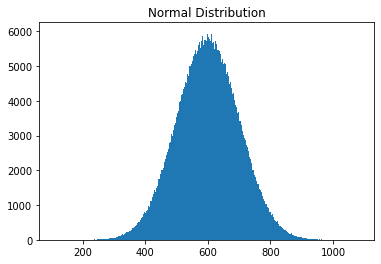

In [7]:
from scipy.stats import norm
import matplotlib.pyplot as plt

x=np.random.normal(loc=600, scale=100, size=1500000)
plt.hist(x,bins=1000)
plt.title('Normal Distribution')
plt.show()

[**Exponential Distribution**](https://en.wikipedia.org/wiki/Exponential_distribution)

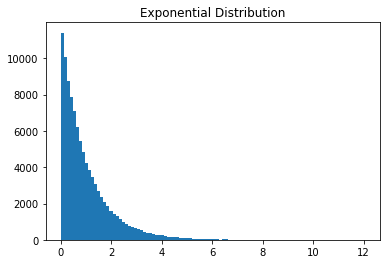

In [8]:
x=np.random.exponential(size=100000)
plt.hist(x,bins=100)
plt.title('Exponential Distribution')
plt.show()

[**Binomial Distribution**](https://en.wikipedia.org/wiki/Binomial_distribution)

Hint: is its shape similar to bell curve (normal distribution)? 

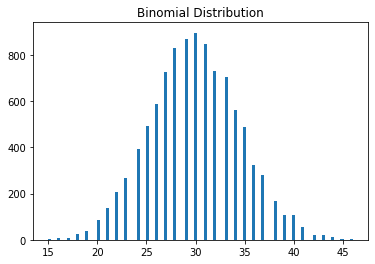

In [9]:
x=np.random.binomial(100,0.3,size=10000)
plt.hist(x,bins=100)
plt.title('Binomial Distribution')
plt.show()

# 4. Re-visit coin tossing, but this time you got a unfair coin.

**Define an unfair coin (i.e., function *coinFlip*), where p is the chance of getting the head (i.e., 1)**

In [10]:
def coinFlip(p):    
    #perform the binomial distribution (returns 0 or 1)    
    result = np.random.binomial(1,p) 
    #return flip to be added to numpy array    
    return result

**Let's play a game called *"100_Coins"*: toss the coin 100 times, and see how many times you see the head?**

In [11]:
p_head = 0.8
out = []
for i in range(100):
    out.append(coinFlip(p_head))

print("The sequence of tossing this unfair coin: \n", out)
print("\n The probability of seeing head is %.2f \n" % np.mean(out))

The sequence of tossing this unfair coin: 
 [1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1]

 The probability of seeing head is 0.80 



**If one play the game "100_Coins" 1MM times, we record the number of heads at the end of each game.** 

**Question**: What's the distribution of *the number of heads*? 

*Hint*: we just studied.

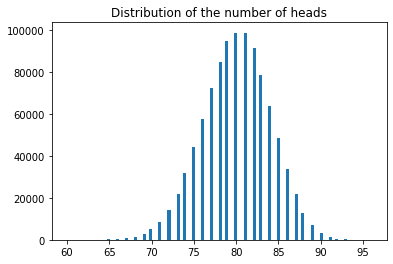

In [12]:
from  scipy.stats import binom
draws = binom.rvs(n=100, p=p_head, size=1000000)
plt.hist(draws,bins=100)
plt.title('Distribution of the number of heads')
plt.show()

# 5. The random number generation mechanism 

**We do a simple example: transform uniform distribution into exponential distribution**

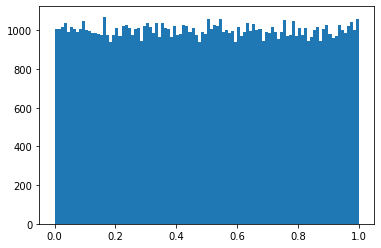

In [13]:
x=np.random.uniform(size=100000)
plt.hist(x,bins=100)
plt.show()

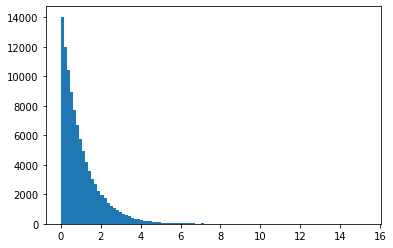

In [14]:
x=np.random.uniform(size=100000)
y=-np.log(x)
plt.hist(y,bins=100)
plt.show()

**Compare with exponential distribution~**

**How about Normal?**

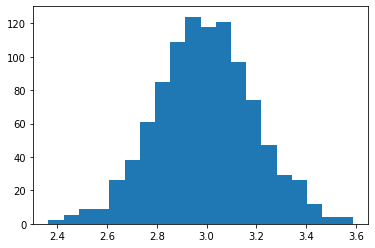

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import erfinv

X = np.random.uniform(0,1,1000)
Gauss = lambda x, mu, sigma: mu + np.sqrt(2)*sigma*erfinv(2*X-1)
plt.hist(Gauss(X, 3, 0.2), bins = 20)
plt.show()

<span style="color:green;font-weight:700;font-size:20px"> 
**Hope you enjoy this module as much as your summer break!!!** 
</span>    
**See you next time!**


